## Preamble

In [47]:
#pip install sympy
#pip install numpy
#pip install pandas
#pip install matplotlib

In [6]:
import numpy as np
from sympy import symbols, Eq, solve
from sympy.interactive import printing
from sympy import pi
import pandas as pd
import matplotlib.pyplot as plt

## Calibration

### Import data

In [9]:
# File import
with open('calibrationdataCryo.txt', 'r') as file:
    lines = file.readlines()[0:]

data = []
for line in lines:
    # Split
    parts = line.split()
    
    # Bye first column
    row = parts[2:]
    data.append(row)

# Column names
columns = [
     "Frequency", "Re(1ω)", "Im(1ω)", "Re(3ω)", "Im(3ω)", "Phase(1ω)", "Phase(3ω)",
    "Vref", "Current", "Re(ΔT)", "Δ[Re(ΔT)]", "Im(ΔT)", "Δ[Im(ΔT)]", "Power", "Temperature"
]

# DataFrame
df = pd.DataFrame(data, columns=columns)
print(df)

   Frequency             Re(1ω)              Im(1ω)             Re(3ω)  \
0     10.000  0.000387953496807   0.000000000000002  0.000048812323303   
1     12.743  0.000394315199843  -0.000000000000001  0.000047383377139   
2     16.238  0.000405627627417  -0.000000000000003  0.000047144998565   
3     20.691  0.000422922871691   0.000000000000001  0.000046549020696   
4     26.367  0.000448950358278  -0.000000000000004  0.000046434519033   
5     33.598  0.000489432222370   0.000000000000003  0.000047053490665   
6     42.813  0.000547847773384  -0.000000000000001  0.000046474365742   
7     54.556  0.000631601843514   0.000000000000007  0.000045878440418   
8     69.519  0.000749316812666  -0.000000000000003  0.000043707337653   
9     88.587  0.000906615667437  -0.000000000000008  0.000041499506788   
10   112.884  0.001111796890898  -0.000000000000027  0.000038388932370   
11   143.845  0.001378383807282  -0.000000000000012  0.000035379786101   
12   183.298  0.001720069307851  -0.00

In [10]:
df

,Frequency,Re(1ω),Im(1ω),Re(3ω),Im(3ω),Phase(1ω),Phase(3ω),Vref,Current,Re(ΔT),Δ[Re(ΔT)],Im(ΔT),Δ[Im(ΔT)],Power,Temperature
0,10.000,0.000387953496807,0.000000000000002,0.000048812323303,-0.000018603620542,0.000000000346644,-20.863118873853402,0.072630,0.007263,0.030084,0.000000,-0.011466,0.012350,0.000003,10.67
1,12.743,0.000394315199843,-0.000000000000001,0.000047383377139,-0.000019261869470,-0.000000000095081,-22.122288617799825,0.072651,0.007265,0.029195,0.000000,-0.011868,0.012784,0.000003,10.67
2,16.238,0.000405627627417,-0.000000000000003,0.000047144998565,-0.000019500672174,-0.000000000465156,-22.471544671649127,0.072650,0.007265,0.029048,0.000000,-0.012015,0.012942,0.000003,10.67
3,20.691,0.000422922871691,0.000000000000001,0.000046549020696,-0.000020140709309,0.000000000178724,-23.397044525056561,0.072654,0.007265,0.028680,0.000000,-0.012409,0.013366,0.000003,10.68
4,26.367,0.000448950358278,-0.000000000000004,0.000046434519033,-0.000019511146043,-0.000000000565626,-22.791475911283364,0.072659,0.007266,0.028607,0.000000,-0.012020,0.012948,0.000003,10.69
5,33.598,0.000489432222370,0.000000000000003,0.000047053490665,-0.000018561559632,0.000000000335778,-21.528135902307199,0.072662,0.007266,0.028987,0.000000,-0.011435,0.012317,0.000004,10.70
6,42.813,0.000547847773384,-0.000000000000001,0.000046474365742,-0.000015557240388,-0.000000000123788,-18.507910508623134,0.072666,0.007267,0.028629,0.000000,-0.009583,0.010323,0.000004,10.72
7,54.556,0.000631601843514,0.000000000000007,0.000045878440418,-0.000013763781892,0.000000000627997,-16.699530402551190,0.072673,0.007267,0.028259,0.000000,-0.008478,0.009132,0.000005,10.74
8,69.519,0.000749316812666,-0.000000000000003,0.000043707337653,-0.000011171957973,-0.000000000226228,-14.338271781029684,0.072686,0.007269,0.026917,0.000000,-0.006880,0.007412,0.000005,10.78
9,88.587,0.000906615667437,-0.000000000000008,0.000041499506788,-0.000009125680799,-0.000000000498482,-12.401873347546440,0.072683,0.007268,0.025558,0.000000,-0.005620,0.006055,0.000007,10.83


### Korrelationsgleichung fuer die Kalibrierung

In [11]:
# LaTeX rendering
printing.init_printing()

In [12]:
# Define variables
dRdT = symbols('dR/dT')
dVdf= symbols('dV3w/dlnf')
dR,dT,L,lambda_sub,lambda_air,f,P,I = symbols('dR dT L lambda_sub lambda_air f P I')


In [13]:
equation_dRdT = Eq( ((-4*pi*L)/(P*I))*(lambda_sub)*(dVdf)- dRdT,0)

In [14]:
display(equation_dRdT)

### dR/dT Berechnung (unter Cryo)

#### Parameters fuer die Berechnung

In [15]:
# Geometrie und Bedingungen
T_ref=25                  # Room temperature, 25 03.12.24
lambda_substrate_ref= 1.2 # Temperature 20C

# Slope dRe(V3w)/dlnf Berechnung
v3w=df['Re(3ω)'].values
f=df['Frequency'].values
v3w=v3w.astype(float)
f=f.astype(float)

## dRdT Berechnung

L_mess=1000e-6
P_mess= df['Power'].values
P_mess=P_mess.astype(float)

I_mess= df['Current'].values
I_mess=I_mess.astype(float)

#### Substrate thermal conductivity

In [16]:
lambdaSubstrate=lambda T: 1.2 + 0.0013*(T-20)

#### Slope dRe(V3w)/dln(f)

In [17]:
v3w

array([4.88123233e-05, 4.73833771e-05, 4.71449986e-05, 4.65490207e-05,
       4.64345190e-05, 4.70534907e-05, 4.64743657e-05, 4.58784404e-05,
       4.37073377e-05, 4.14995068e-05, 3.83889324e-05, 3.53797861e-05,
       3.28450208e-05, 3.04493661e-05, 2.78821975e-05, 2.57196189e-05,
       2.45145514e-05, 2.25011902e-05, 2.27301372e-05, 2.16307716e-05])

In [18]:
lnf=np.log(f)

In [19]:
print(v3w)
print(f)
print(lnf)

[4.88123233e-05 4.73833771e-05 4.71449986e-05 4.65490207e-05
 4.64345190e-05 4.70534907e-05 4.64743657e-05 4.58784404e-05
 4.37073377e-05 4.14995068e-05 3.83889324e-05 3.53797861e-05
 3.28450208e-05 3.04493661e-05 2.78821975e-05 2.57196189e-05
 2.45145514e-05 2.25011902e-05 2.27301372e-05 2.16307716e-05]
[  10.      12.743   16.238   20.691   26.367   33.598   42.813   54.556
   69.519   88.587  112.884  143.845  183.298  233.572  297.635  379.269
  483.293  615.848  784.76  1000.   ]
[2.30258509 2.5449821  2.78735417 3.02969882 3.27211323 3.51446654
 3.75684179 3.9992277  4.2416001  4.48398512 4.72636074 4.96873633
 5.21111324 5.45349038 5.6958679  5.93824572 6.18062309 6.42300018
 6.66537794 6.90775528]


Slope: -6.8168861922053655e-06, Intercept: 6.854187608083748e-05


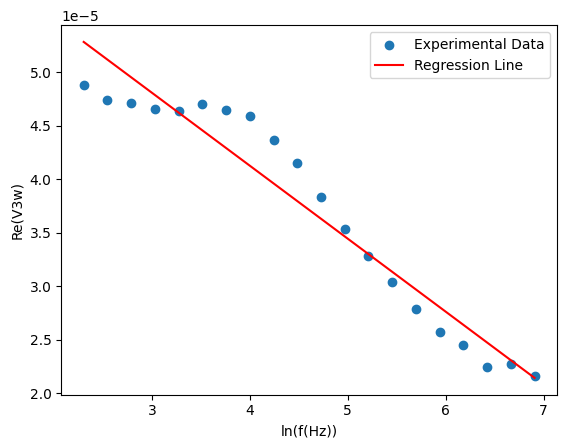

In [20]:
X=lnf
Y=v3w
# Perform linear regression using NumPy's polyfit
coefficients = np.polyfit(X, Y, 1)
slope, intercept = coefficients

# Print the slope and intercept
print(f"Slope: {slope}, Intercept: {intercept}")

# Linear regression
Y_pred = slope * X + intercept

# Plot the data and regression line
plt.scatter(X, Y, label='Experimental Data')
plt.plot(X, Y_pred, color='red', label='Regression Line')
plt.xlabel('ln(f(Hz))')
plt.ylabel('Re(V3w)')
plt.legend()
plt.show()

In [22]:
# Sölope 'dV3w/dlnf' calculated for dR/dT calculation

dVdf_mess=slope
print(dVdf_mess)

-6.8168861922053655e-06


#### dR/dT Berechnung

In [23]:
P_mean= np.mean(P_mess)
I_mean= np.mean(I_mess)
lambdaSubstrate_mess=lambdaSubstrate(T_ref)
print(P_mean)
print(I_mean)
print(lambdaSubstrate_mess)

1.5250000000000001e-05
0.00726855
1.2065


In [24]:
substituted_eq = equation_dRdT.subs({P: P_mean, I:I_mean, lambda_sub:lambdaSubstrate_mess,dVdf:dVdf_mess, L:L_mess})

In [25]:
substituted_eq

In [26]:
sol = solve(substituted_eq, dRdT)

In [27]:
dRdT_mess=float(sol[0])
print(dRdT_mess)

0.9324071771747745


## Messung

### Import data

In [22]:
# File import
with open('testdata.txt', 'r') as file:
    lines = file.readlines()[0:]

data_sample = []
for line in lines:
    # Split
    parts = line.split()
    
    # Bye first column
    row = parts[2:]
    data_sample.append(row)

# Column names
columns = [
     "Frequency", "Re(1ω)", "Im(1ω)", "Re(3ω)", "Im(3ω)", "Phase(1ω)", "Phase(3ω)",
    "Vref", "Current", "Re(ΔT)", "Δ[Re(ΔT)]", "Im(ΔT)", "Δ[Im(ΔT)]", "Power", "Temperature"
]

# DataFrame
df_sample = pd.DataFrame(data_sample, columns=columns)
print(df_sample)

  Frequency             Re(1ω)              Im(1ω)             Re(3ω)  \
0    10.000  0.128168420396861  -0.000000000000004  0.001201514320429   
1    14.592  0.128929742917524   0.000000000000003  0.001113346330013   
2    21.294  0.129612913502709   0.000000000000004  0.001029477080947   
3    31.072  0.130401750345415   0.000000000000010  0.000950022228322   
4    45.342  0.130923792752236   0.000000000000005  0.000871625278675   
5    66.164  0.131501573258185  -0.000000000000018  0.000796766542770   
6    96.549  0.131855597866627   0.000000000000010  0.000723240231149   
7   140.887  0.132121031585632  -0.000000000000012  0.000650013159849   
8   205.587  0.132404500544174   0.000000000000039  0.000577341312168   
9   300.000  0.132491124737582   0.000000000000149  0.000507469009460   

               Im(3ω)           Phase(1ω)            Phase(3ω)      Vref  \
0  -0.000279804426717  -0.000000000001870  -13.109195621472953  0.099384   
1  -0.000277384384230   0.000000000001249  -

In [23]:
dRdT_mess=float(sol[0])

In [24]:
print(dRdT_mess)

0.2423272639314181


### Korrelationsgleichung fuer die Messung

In [25]:
# Define variables
dRdT = symbols('dR/dT')
dVdf= symbols('dV3w/dlnf')
dR,dT,L,lambda_sample,lambda_sub,f,P,I = symbols('dR dT L lambda_sample, lambda_sub f P I')

In [26]:
equation_lambdaSample= Eq( (-P*I*dRdT/(4*pi*L))*(dVdf)**(-1)-lambda_sub-lambda_sample,0)

In [27]:
display(equation_lambdaSample)

### Thermal conductivity Berechnung

#### Parameters fuer die Berechnung

In [28]:
# Geometrie und Bedingungen
T_ref=24                  # Room temperature
lambda_substrate_ref= 1.2 # Temperature 20C
print(dRdT_mess)

# Slope dRe(V3w)/dlnf Berechnung
v3w=df['Re(3ω)'].values
f=df['Frequency'].values
v3w=v3w.astype(float)
f=f.astype(float)

## dRdT Berechnung

L_mess=1000e-6
P_mess= df['Power'].values
P_mess=P_mess.astype(float)

I_mess= df['Current'].values
I_mess=I_mess.astype(float)

0.2423272639314181


#### Slope dRe(V3w)/dln(f)

In [29]:
v3w

array([0.00120151, 0.00111335, 0.00102948, 0.00095002, 0.00087163,
       0.00079677, 0.00072324, 0.00065001, 0.00057734, 0.00050747])

In [30]:
lnf=np.log(f)

In [31]:
print(v3w)
print(f)
print(lnf)

[0.00120151 0.00111335 0.00102948 0.00095002 0.00087163 0.00079677
 0.00072324 0.00065001 0.00057734 0.00050747]
[ 10.     14.592  21.294  31.072  45.342  66.164  96.549 140.887 205.587
 300.   ]
[2.30258509 2.68047343 3.05842534 3.43630709 3.81423376 4.19213651
 4.57005065 4.94795815 5.3258693  5.70378247]


Slope: -0.00020288505883722638, Intercept: 0.0016542674015800065


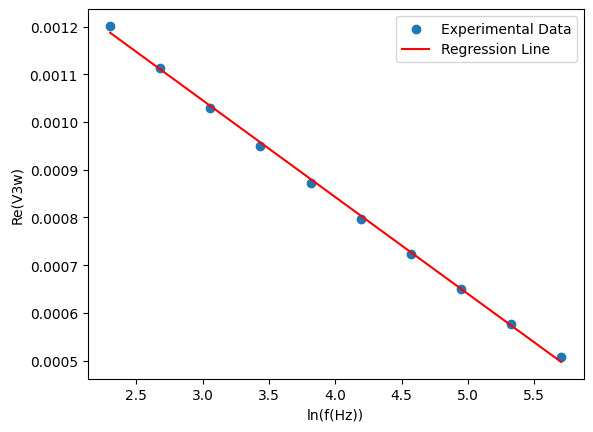

In [32]:
X=lnf
Y=v3w
# Perform linear regression using NumPy's polyfit
coefficients = np.polyfit(X, Y, 1)
slope, intercept = coefficients

# Print the slope and intercept
print(f"Slope: {slope}, Intercept: {intercept}")

# Linear regression
Y_pred = slope * X + intercept

# Plot the data and regression line
plt.scatter(X, Y, label='Experimental Data')
plt.plot(X, Y_pred, color='red', label='Regression Line')
plt.xlabel('ln(f(Hz))')
plt.ylabel('Re(V3w)')
plt.legend()
plt.show()

In [33]:
# Sölope 'dV3w/dlnf' calculated for dR/dT calculation

dVdf_mess=slope
print(dVdf_mess)

-0.00020288505883722638


#### Thermal conductivity der Probe Berechnung

In [34]:
P_mean= np.mean(P_mess)
I_mean= np.mean(I_mess)
lambdaSubstrate_mess=lambdaSubstrate(T_ref)
print(P_mean)
print(I_mean)
print(lambdaSubstrate_mess)
print(dRdT_mess)

0.0012881
0.0098439
1.2052
0.2423272639314181


In [35]:
substituted_eqLambdaSample = equation_lambdaSample.subs({dRdT:dRdT_mess,P: P_mean, I:I_mean, lambda_sub:lambdaSubstrate_mess,dVdf:dVdf_mess, L:L_mess})

In [36]:
substituted_eqLambdaSample

In [37]:
solSample = solve(substituted_eq, dRdT)

In [38]:
lambdaSample_mess=float(solSample[0])
print(lambdaSample_mess)

0.2423272639314181
